# 1. Data preprocessing

First merge training set and test set into one dataframe

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor 
#mpl.rcParams['axes.linewidth'] = 1.5
#mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline
#sns.set_style("whitegrid")

train_df = pd.read_csv('train.csv')
print ("training set has ", train_df.shape)
list_col_train = list(train_df)

training set has  (1460, 81)


## Remove outliers

In [2]:
# Check the linear dependence between feature1 and feature2
def plot_corr(feature1, feature2, df_name1, df_name2):
    plt.plot(df_name1[feature1], df_name1[feature2],'.')
    plt.plot(df_name2[feature1], df_name2[feature2],'.')
    plt.xlabel(feature1, fontsize=12)
    plt.ylabel(feature2, fontsize=12)
    plt.xticks(rotation=0)
#
def plot_multiple(select, df_name1, df_name2):
    nselect = len(select)
    nplot = (nselect-1)
    nplot_col = 4
    nplot_row = nplot/nplot_col+1
    #print (nplot_col, nplot_row)
    nsize = 4
    plt.figure(figsize = (nsize*nplot_col,nsize*nplot_row))
    count = 1
    var2 = select[-1]
    for ind1 in range(len(select)-1):
        plt.subplot(nplot_row, nplot_col, count)
        count += 1
        var1 = select[ind1]
        plot_corr(var1, var2, df_name1, df_name2)

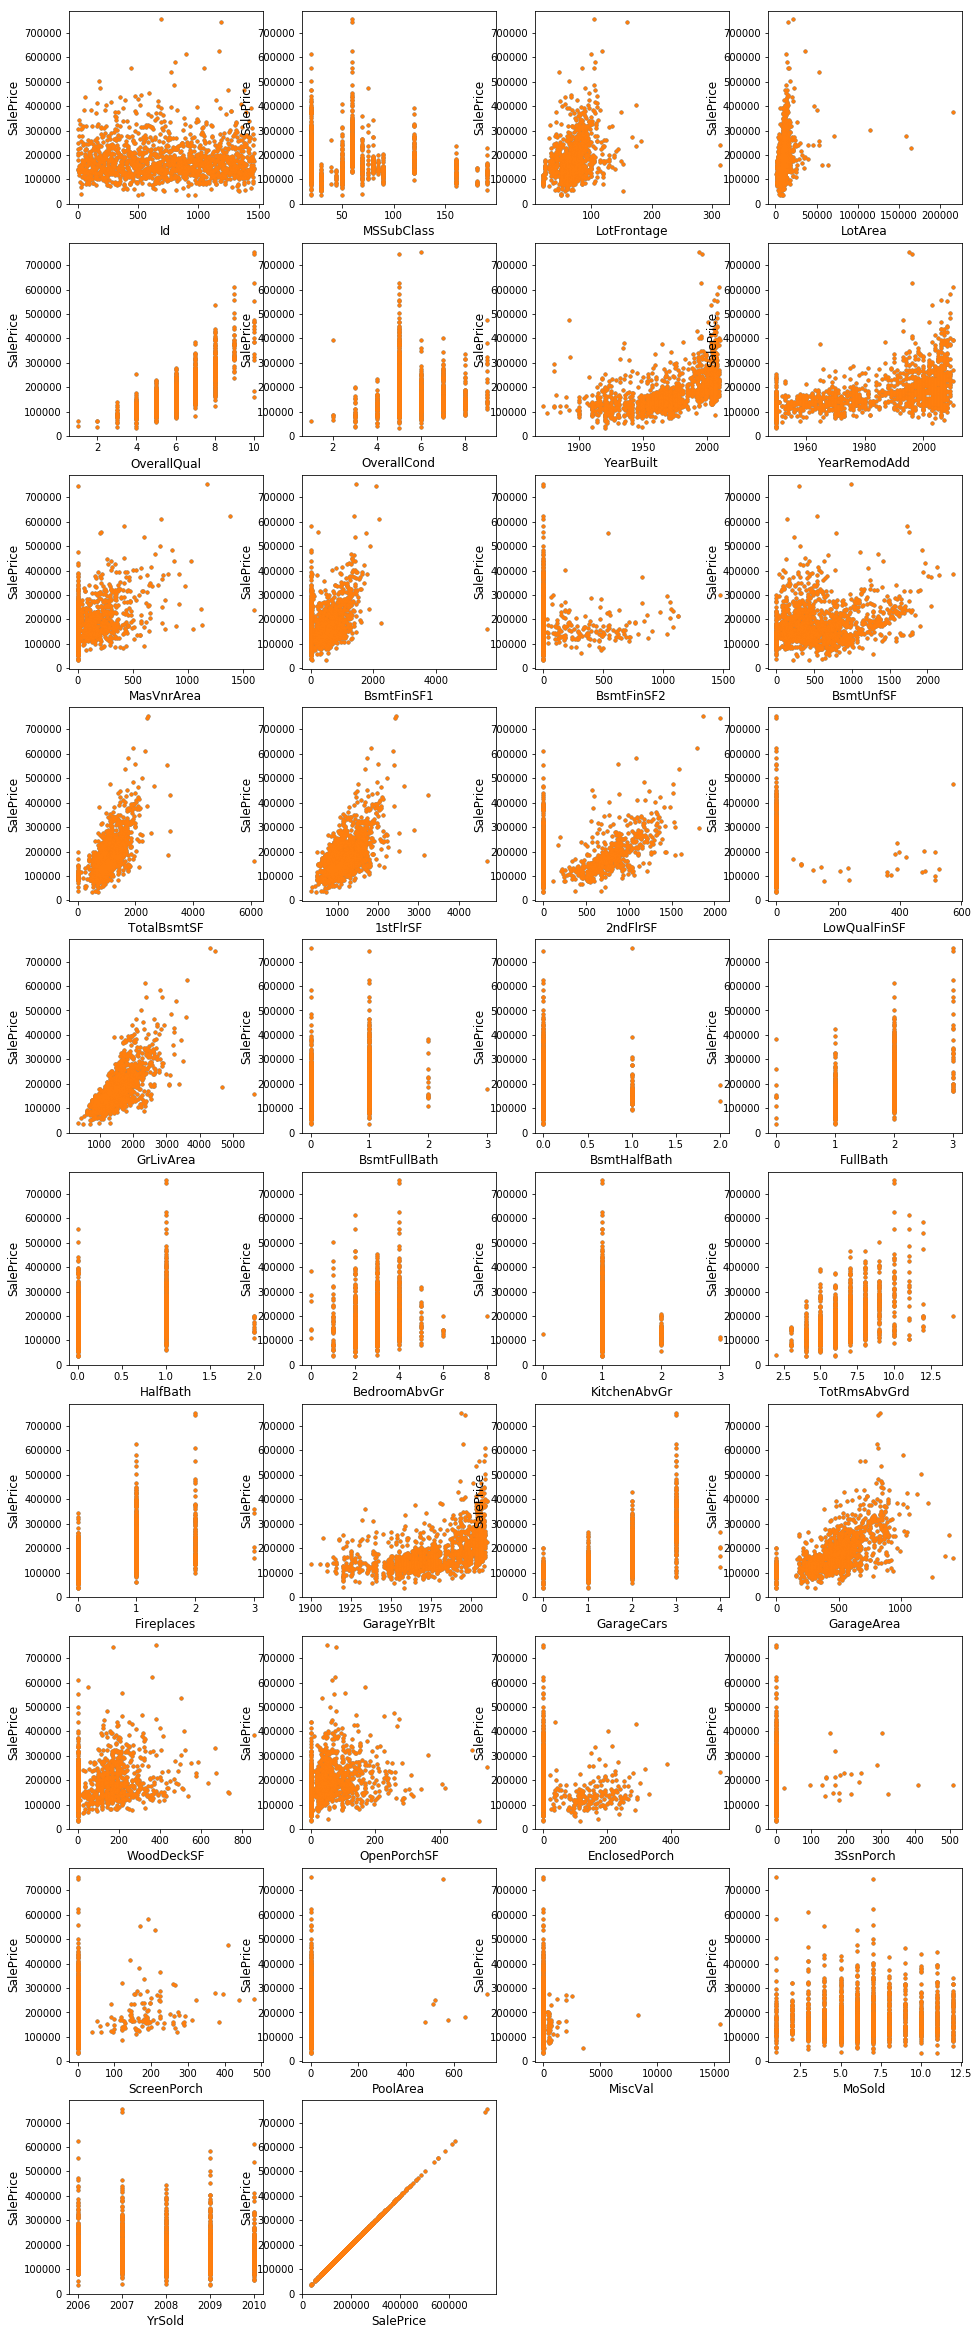

In [3]:
num_cols = list(train_df.select_dtypes(exclude=[np.object,np.datetime64]))
num_cols.append('SalePrice')
plot_multiple(num_cols, train_df, train_df)

/Users/pham20/.local/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


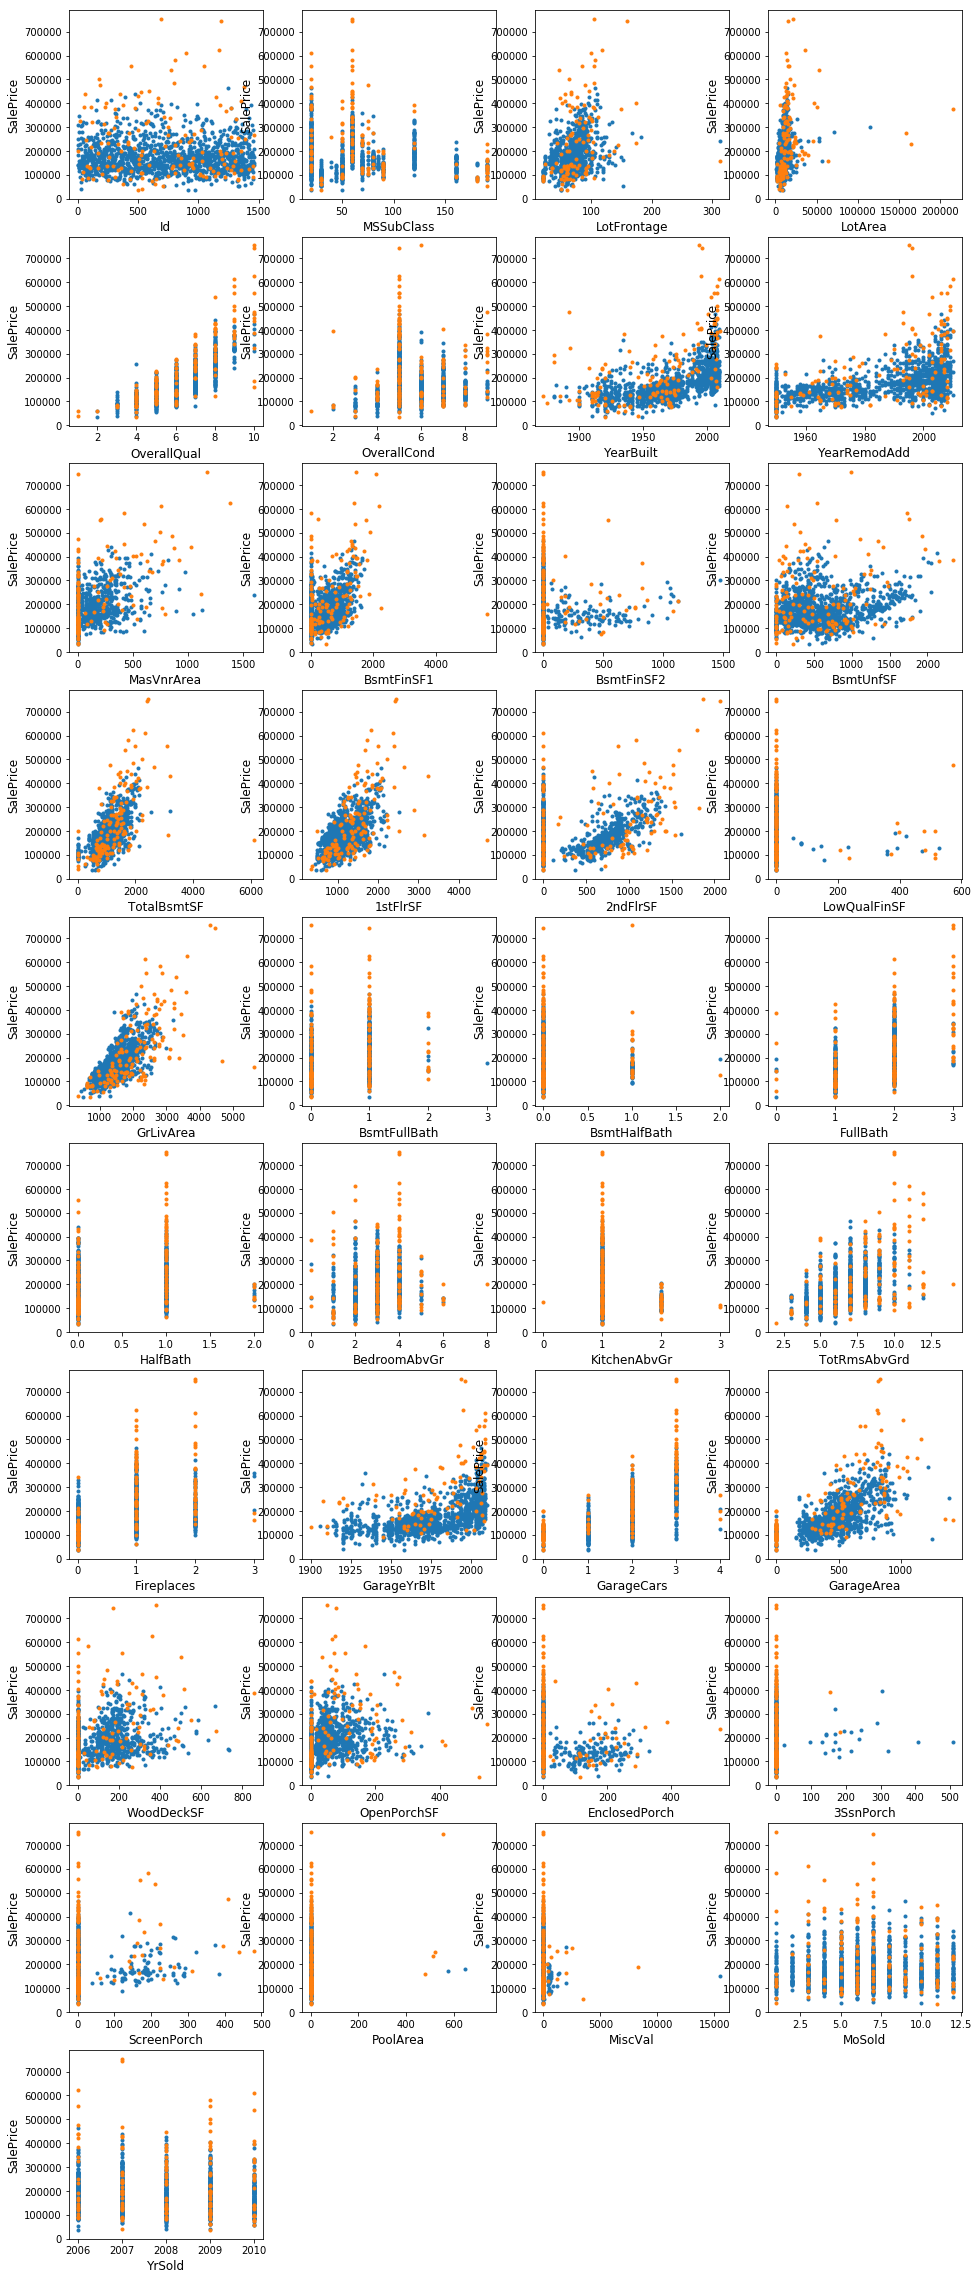

In [4]:
from sklearn.ensemble import IsolationForest

num_cols = list(train_df.select_dtypes(exclude=[np.object,np.datetime64]))
train = train_df[num_cols]
train.drop('Id',axis = 1, inplace = True)
train.fillna(0,inplace=True)

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train)
y_noano = clf.predict(train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
NotOutliers = y_noano[y_noano['Top'] == 1].index.values
IsOutliers = y_noano[y_noano['Top'] == -1].index.values

plot_multiple(num_cols, train_df.iloc[NotOutliers], train_df.iloc[IsOutliers])
#train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
#train_df.reset_index(drop = True, inplace = True)
#print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
#print("Number of rows without outliers:", train.shape[0])

In [5]:
train_df = train_df.iloc[NotOutliers]

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1314 entries, 0 to 1459
Data columns (total 81 columns):
Id               1314 non-null int64
MSSubClass       1314 non-null int64
MSZoning         1314 non-null object
LotFrontage      1084 non-null float64
LotArea          1314 non-null int64
Street           1314 non-null object
Alley            80 non-null object
LotShape         1314 non-null object
LandContour      1314 non-null object
Utilities        1314 non-null object
LotConfig        1314 non-null object
LandSlope        1314 non-null object
Neighborhood     1314 non-null object
Condition1       1314 non-null object
Condition2       1314 non-null object
BldgType         1314 non-null object
HouseStyle       1314 non-null object
OverallQual      1314 non-null int64
OverallCond      1314 non-null int64
YearBuilt        1314 non-null int64
YearRemodAdd     1314 non-null int64
RoofStyle        1314 non-null object
RoofMatl         1314 non-null object
Exterior1st      1314 non-n

In [7]:
result_col = 'SalePrice'
ID_col = 'Id'

test_df = pd.read_csv('test.csv')

print ("test set has ", test_df.shape)
ntest = test_df.shape[0]

print ("add one column to the test set")
print ("merge training set and test set to all_data")

# Put all data together so we can wrangle all the data at the same time
all_data = pd.concat([train_df, test_df], ignore_index=True)
all_data = all_data[list_col_train]
print ("all_data has ", all_data.shape)

can_drop = []
good_features = []

test set has  (1459, 80)
add one column to the test set
merge training set and test set to all_data
all_data has  (2773, 81)


## 1.1 Deal with duplicated data
There is no duplicated data. That is good.


In [8]:
all_data[all_data.duplicated(keep=False)].index

Int64Index([], dtype='int64')

In [9]:
#Ytrain = train_df[result_col]
test_df[result_col] = np.nan

all_data[all_data[ID_col].duplicated(keep=False)].index

Int64Index([], dtype='int64')

In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2773 entries, 0 to 2772
Data columns (total 81 columns):
Id               2773 non-null int64
MSSubClass       2773 non-null int64
MSZoning         2769 non-null object
LotFrontage      2316 non-null float64
LotArea          2773 non-null int64
Street           2773 non-null object
Alley            187 non-null object
LotShape         2773 non-null object
LandContour      2773 non-null object
Utilities        2771 non-null object
LotConfig        2773 non-null object
LandSlope        2773 non-null object
Neighborhood     2773 non-null object
Condition1       2773 non-null object
Condition2       2773 non-null object
BldgType         2773 non-null object
HouseStyle       2773 non-null object
OverallQual      2773 non-null int64
OverallCond      2773 non-null int64
YearBuilt        2773 non-null int64
YearRemodAdd     2773 non-null int64
RoofStyle        2773 non-null object
RoofMatl         2773 non-null object
Exterior1st      2772 non-

## 1.2 Look for main features
Main features then are used to fill null

In [11]:
feature = 'MSSubClass'
all_data[feature].value_counts()

20     1051
60      543
50      273
120     178
30      132
160     125
70      119
80      114
90       95
85       47
190      45
45       18
75       14
180      13
40        5
150       1
Name: MSSubClass, dtype: int64

In [12]:
all_data[feature] = all_data[feature].apply(str)
good_features.append(feature)

In [13]:
feature = 'SaleCondition'
all_data[feature].value_counts()

Normal     2298
Partial     224
Abnorml     174
Family       45
Alloca       22
AdjLand      10
Name: SaleCondition, dtype: int64

In [14]:
good_features.append(feature)

In [15]:
feature = 'SaleType'
all_data[feature].value_counts()

WD       2409
New       219
COD        82
ConLD      24
CWD        12
ConLI       8
ConLw       7
Oth         6
Con         5
Name: SaleType, dtype: int64

In [16]:
good_features.append(feature)

In [17]:
feature = 'YrSold'
all_data[feature].value_counts()

2007    659
2009    609
2006    596
2008    592
2010    317
Name: YrSold, dtype: int64

In [18]:
all_data[feature] = all_data[feature].apply(str)
good_features.append(feature)

In [19]:
feature = 'MoSold'
all_data[feature].value_counts()

6     479
7     426
5     375
4     270
8     224
3     217
10    165
9     149
2     132
11    128
1     111
12     97
Name: MoSold, dtype: int64

In [20]:
all_data[feature] = all_data[feature].apply(str)
good_features.append(feature)

find the null columns and non-null comlumns

In [21]:
obj_cols = list(all_data.select_dtypes(include=[np.object]))
sub_df = all_data[obj_cols]

null_cols = sub_df.columns[sub_df.isnull().any()].tolist()
non_null_cols = [col for col in obj_cols if col not in null_cols]

print ((null_cols), non_null_cols)

['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType'] ['MSSubClass', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'PavedDrive', 'MoSold', 'YrSold', 'SaleCondition']


Plot for non-null comlumns

nplot_col, nplot_row = 4 6


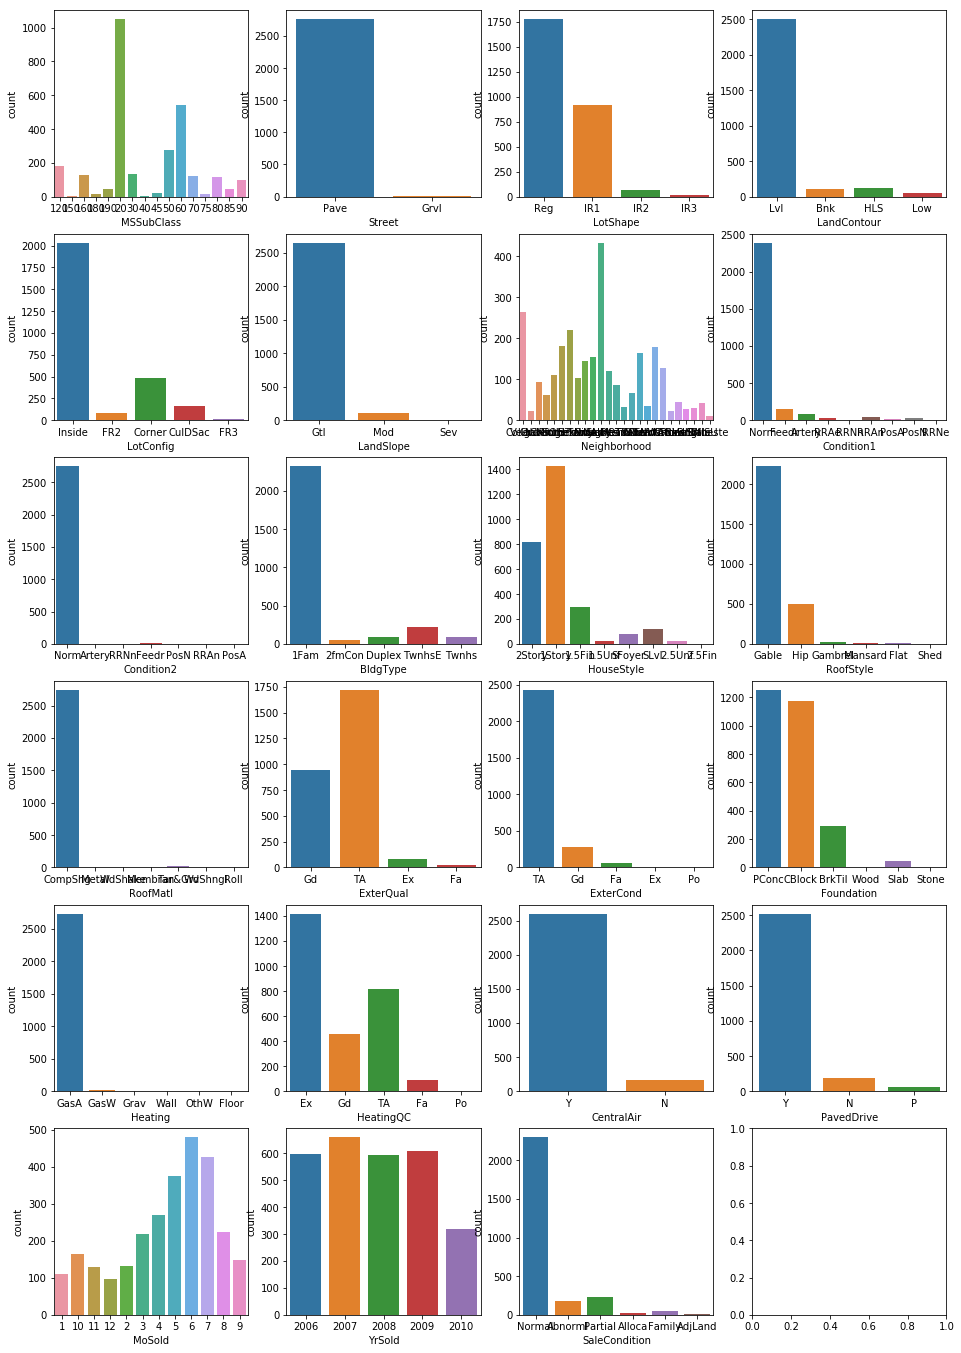

In [22]:
import seaborn as sns

feature_plot = non_null_cols

nplot = len(feature_plot)
nplot_col = 4
nplot_row = int(nplot/nplot_col) + 1
print ('nplot_col, nplot_row =', nplot_col,  nplot_row)
nsize = 4

count = 0

fig, ax =plt.subplots( nplot_row, nplot_col, figsize = (nsize*nplot_col, nsize*nplot_row))

for index_x in range(nplot_row):
    for index_y in range(nplot_col):
        if (count < nplot):
            feature = feature_plot[count]
            try:
                g = sns.countplot(x=feature, data=all_data, ax=ax[index_x][index_y])
                g.set_xticklabels(g.get_xticklabels(),rotation=0)
            except:
                g = sns.countplot(x=feature, data=all_data, ax=ax[index_y])
                g.set_xticklabels(g.get_xticklabels(),rotation=0)
        count += 1

Plot for null comlumns

nplot_col, nplot_row = 4 6


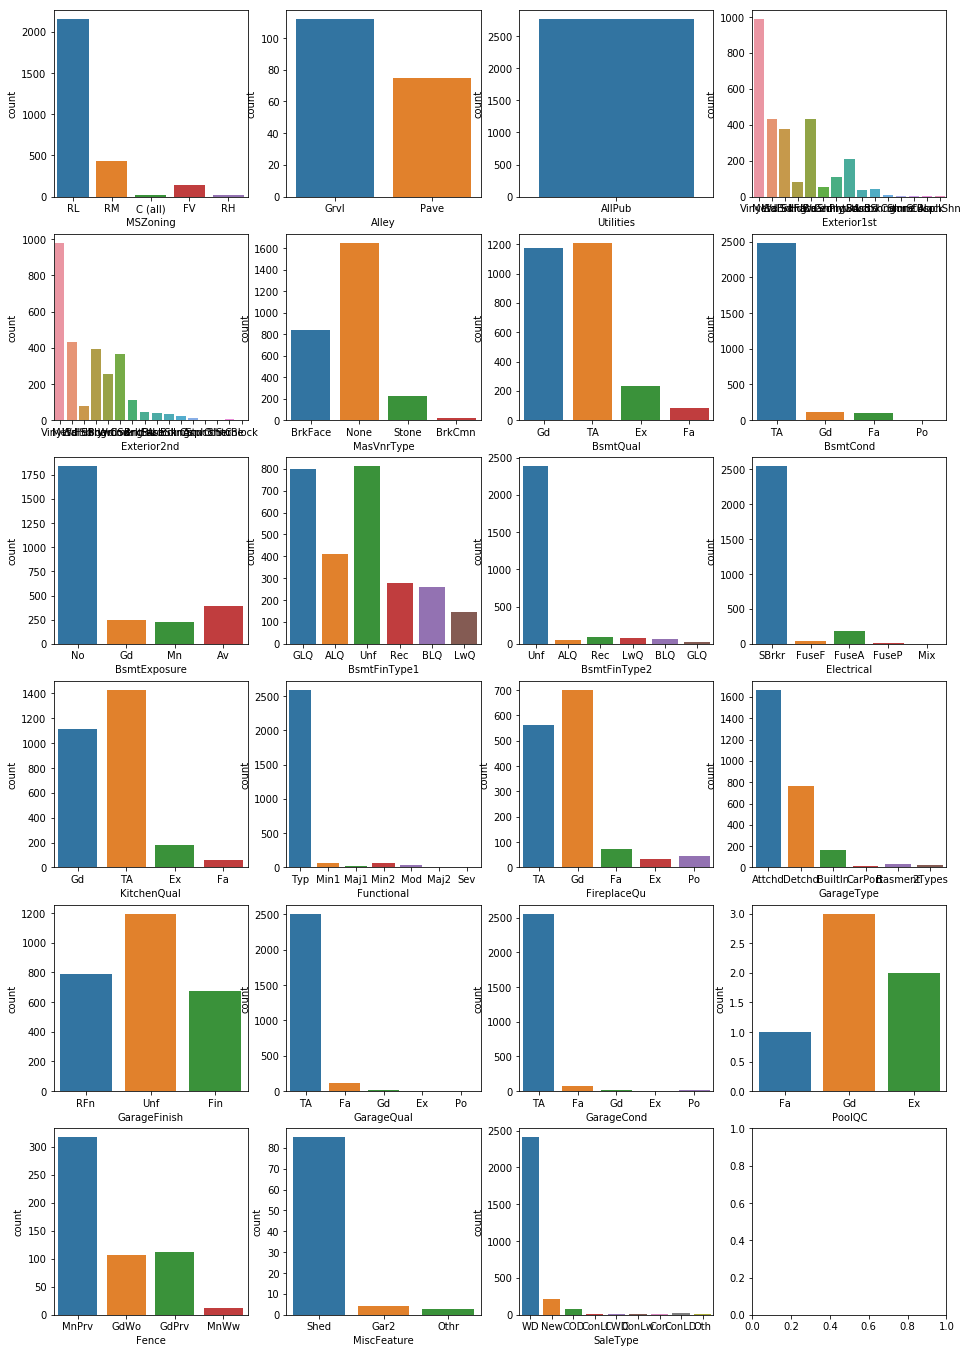

In [23]:
import seaborn as sns

feature_plot = null_cols

nplot = len(feature_plot)
nplot_col = 4
nplot_row = int(nplot/nplot_col) + 1
print ('nplot_col, nplot_row =', nplot_col,  nplot_row)
nsize = 4

count = 0

fig, ax =plt.subplots( nplot_row, nplot_col, figsize = (nsize*nplot_col, nsize*nplot_row))

for index_x in range(nplot_row):
    for index_y in range(nplot_col):
        if (count < nplot):
            feature = feature_plot[count]
            try:
                g = sns.countplot(x=feature, data=all_data, ax=ax[index_x][index_y])
                g.set_xticklabels(g.get_xticklabels(),rotation=0)
            except:
                g = sns.countplot(x=feature, data=all_data, ax=ax[index_y])
                g.set_xticklabels(g.get_xticklabels(),rotation=0)
        count += 1

In [24]:
for col in null_cols:
    all_data[col].fillna(all_data[col].mode()[0], inplace=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2773 entries, 0 to 2772
Data columns (total 81 columns):
Id               2773 non-null int64
MSSubClass       2773 non-null object
MSZoning         2773 non-null object
LotFrontage      2316 non-null float64
LotArea          2773 non-null int64
Street           2773 non-null object
Alley            2773 non-null object
LotShape         2773 non-null object
LandContour      2773 non-null object
Utilities        2773 non-null object
LotConfig        2773 non-null object
LandSlope        2773 non-null object
Neighborhood     2773 non-null object
Condition1       2773 non-null object
Condition2       2773 non-null object
BldgType         2773 non-null object
HouseStyle       2773 non-null object
OverallQual      2773 non-null int64
OverallCond      2773 non-null int64
YearBuilt        2773 non-null int64
YearRemodAdd     2773 non-null int64
RoofStyle        2773 non-null object
RoofMatl         2773 non-null object
Exterior1st      2773 no

# Numeric variables

In [25]:
num_cols = list(all_data.select_dtypes(exclude=[np.object,np.datetime64]))
sub_df = all_data[num_cols]

null_cols = sub_df.columns[sub_df.isnull().any()].tolist()
non_null_cols = [col for col in obj_cols if col not in null_cols]

print ((null_cols), non_null_cols)

['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'] ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


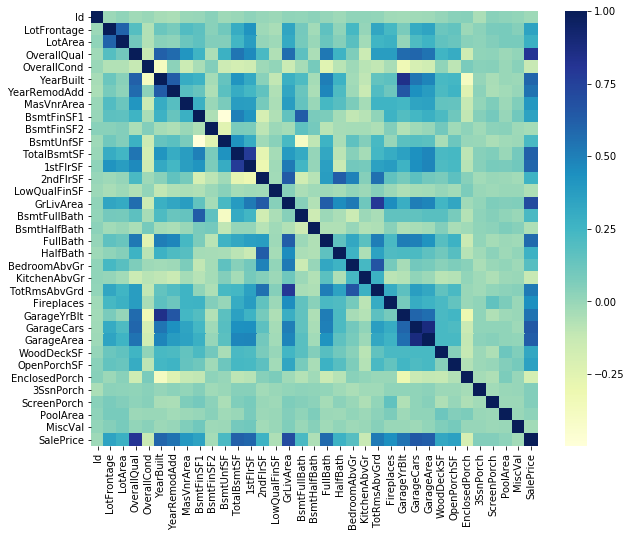

In [26]:
import seaborn as sns

corr = all_data[num_cols].corr()

plt.figure(figsize = (10,8))

sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap="YlGnBu",annot=False)

plt.show()

In [27]:
ntrain = all_data[result_col].notnull().sum()
Ytrain = all_data[result_col].head(ntrain)

In [28]:
for col in null_cols:
    all_data[col].fillna(all_data[col].median(), inplace=True)

In [29]:
all_data2 = all_data.copy()
#all_data2.drop(labels='AUCGUART', axis='columns', inplace=True)
#all_data2.drop(labels='PRIMEUNIT', axis='columns', inplace=True)

for idrop in can_drop:
    all_data2.drop(labels=idrop, axis='columns', inplace=True)
all_data2.drop(labels=ID_col, axis='columns', inplace=True)
all_data2.drop(labels=result_col, axis='columns', inplace=True)

In [30]:
obj_cols = list(all_data2.select_dtypes(include=[np.object]))
add_col = 0
for col in obj_cols:
    print (col, ":  the number of unique data: ", len(all_data2[col].unique()))
    add_col += len(all_data2[col].unique())-1
print ("number of additional columns is:", add_col)

MSSubClass :  the number of unique data:  16
MSZoning :  the number of unique data:  5
Street :  the number of unique data:  2
Alley :  the number of unique data:  2
LotShape :  the number of unique data:  4
LandContour :  the number of unique data:  4
Utilities :  the number of unique data:  1
LotConfig :  the number of unique data:  5
LandSlope :  the number of unique data:  3
Neighborhood :  the number of unique data:  25
Condition1 :  the number of unique data:  9
Condition2 :  the number of unique data:  7
BldgType :  the number of unique data:  5
HouseStyle :  the number of unique data:  8
RoofStyle :  the number of unique data:  6
RoofMatl :  the number of unique data:  7
Exterior1st :  the number of unique data:  15
Exterior2nd :  the number of unique data:  16
MasVnrType :  the number of unique data:  4
ExterQual :  the number of unique data:  4
ExterCond :  the number of unique data:  5
Foundation :  the number of unique data:  6
BsmtQual :  the number of unique data:  4
Bsmt

In [31]:
print (all_data2.shape)
all_data3 = pd.get_dummies(data=all_data2, columns=obj_cols)
print (all_data3.shape)


(2773, 79)
(2773, 314)


In [32]:
# evaluate performance of the random forest models

def rmsle(actual, predicted):
    """
    Args:
        actual (1d-array) - array of actual values (float)
        predicted (1d-array) - array of predicted values (float)
    Returns:
        root mean square log error (float)
    """
    return np.sqrt(np.mean(np.power(actual-predicted, 2)))

def plot_actual_pred(train_actual, train_pred, 
                     test_actual, test_pred,
                     target):
    """
    Args:
        train_actual (1d-array) - actual training values (float)
        train_pred (1d-array) - predicted training values (float)
        test_actual (1d-array) - actual test values (float)
        test_pred (1d-array) - predicted test values (float)
        target (str) - target property
    Returns:
        matplotlib scatter plot of actual vs predicted
    """
    s = 75
    lw = 0
    alpha = 0.2
    train_color = 'orange'
    train_marker = 's'
    test_color = 'blue'
    test_marker = '^'
    axis_width = 1.5
    maj_tick_len = 6
    fontsize = 16
    label = '__nolegend__'
    ax = plt.scatter(train_pred, train_actual,
                     marker=train_marker, color=train_color, s=s, 
                     lw=lw, alpha=alpha, label='train')
    ax = plt.scatter(test_pred, test_actual,
                     marker=test_marker, color=test_color, s=s, 
                     lw=lw, alpha=alpha, label='test')
    ax = plt.legend(frameon=False, fontsize=fontsize, handletextpad=0.4)    
    all_vals = list(train_pred) + list(train_actual) + list(test_pred) + list(test_actual)
    full_range = abs(np.max(all_vals) - np.min(all_vals))
    cushion = 0.1
    xmin = np.min(all_vals) - cushion*full_range
    xmax = np.max(all_vals) + cushion*full_range
    ymin = xmin
    ymax = xmax    
    ax = plt.xlim([xmin, xmax])
    ax = plt.ylim([ymin, ymax])
    ax = plt.plot([xmin, xmax], [ymin, ymax], 
                  lw=axis_width, color='black', ls='--', 
                  label='__nolegend__')
    ax = plt.xlabel('predicted ' + target, fontsize=fontsize)
    ax = plt.ylabel('actual ' + target, fontsize=fontsize)
    ax = plt.xticks(fontsize=fontsize)
    ax = plt.yticks(fontsize=fontsize)
    ax = plt.tick_params('both', length=maj_tick_len, width=axis_width, 
                         which='major', right=True, top=True)
    return ax

In [33]:
# plot the feature importances

def plot_importances(X_train, sorted_features, sorted_importances):
    """
    Args:
        X_train (nd-array) - feature matrix of shape (number samples, number features)
        sorted_features (list) - feature names (str)
        sorted_importances (list) - feature importances (float)
    Returns:
        matplotlib bar chart of sorted importances
    """
    axis_width = 1.5
    maj_tick_len = 6
    fontsize = 14
    bar_color = 'lightblue'
    align = 'center'
    label = '__nolegend__'
    ax = plt.bar(range(X_train.shape[1]), sorted_importances,
                 color=bar_color, align=align, label=label)
    ax = plt.xticks(range(X_train.shape[1]), sorted_features, rotation=90)
    ax = plt.xlim([-1, X_train.shape[1]])
    ax = plt.ylabel('Average impurity decrease', fontsize=fontsize)
    ax = plt.tick_params('both', length=maj_tick_len, width=axis_width, 
                         which='major', right=True, top=True)
    ax = plt.xticks(fontsize=fontsize)
    ax = plt.yticks(fontsize=fontsize)
    ax = plt.tight_layout()
    return ax

#fig3 = plt.figure(3, figsize=(11,6))
#ax1 = plt.subplot(121)
#ax1 = plot_importances(X_train_E, sorted_features_E, sorted_importances_E)
#ax1 = plt.legend(['target values'], fontsize=14, frameon=False)
#plt.tight_layout()
#plt.show()
#plt.close()

In [34]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import Lasso, LassoLars, Ridge , ElasticNet
from sklearn.model_selection import KFold

# use random forests to quantify the importances of each feature
Xtrain = all_data3.head(ntrain)

# split into training and test for the purposes of this demonstration
test_size = 0.3
rstate = 42
X_train_E, X_test_E, y_train_E, y_test_E = train_test_split(Xtrain, Ytrain, test_size=test_size, random_state=rstate)

n_folds = 4
alphas = [1,0.1,0.01]
tuned_parameters_ = [{'alpha': alphas}]

methods = []
tuned_parameters = []

method = Lasso(random_state=0)
tuned_parameters_ = [{'alpha': alphas}]
methods.append(method)
tuned_parameters.append(tuned_parameters_)

method = Ridge(random_state=0)
tuned_parameters_ = [{'alpha': alphas}]
methods.append(method)
tuned_parameters.append(tuned_parameters_)

method =ElasticNet(random_state=0)
tuned_parameters_ = [{'alpha': alphas}]
methods.append(method)
tuned_parameters.append(tuned_parameters_)

#method = RandomForestRegressor()
#tuned_parameters_ = [{'max_depth': [3,5,7,9,11,13]},
#                    {'n_estimators':[100,200,300]}]
#methods.append(method)
#tuned_parameters.append(tuned_parameters_)

#method = AdaBoostRegressor()
#tuned_parameters_ = [{'learning_rate': [1,0.5,0.1]},
#                    {'n_estimators':[50,100,200]}]
#methods.append(method)
#tuned_parameters.append(tuned_parameters_)

#method = GradientBoostingRegressor()
#tuned_parameters_ = [{'learning_rate': [0.1,0.05,0.01]},
#                    {'n_estimators':[100,200,300]}]
#methods.append(method)
#tuned_parameters.append(tuned_parameters_)

#method =
#tuned_parameters_ = 
#methods.append(method)
#uned_parameters.append(tuned_parameters_)


grid_searches = []
for i in range(len(methods)):
    grid_searches.append(GridSearchCV(methods[i], param_grid= tuned_parameters[i], cv=n_folds))

best_scores = []
for i in range(len(methods)):
    grid_searches[i].fit(Xtrain, Ytrain)
    #
    y_train_E_pred = grid_searches[i].predict(X_train_E)
    y_test_E_pred = grid_searches[i].predict(X_test_E)
    RMS_train = rmsle(y_train_E, y_train_E_pred)
    RMS_test = rmsle(y_test_E, y_test_E_pred)
    print('RMSLE for targeted values = %.3f (training) and %.3f (test)' 
      % (RMS_train, RMS_test) )
    #best_scores.append(grid_searches[i].best_score_)
    best_scores.append(-RMS_test)
    print (methods[i], best_scores[i])
    print ()

/Users/pham20/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/pham20/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/pham20/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/pham20/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

RMSLE for targeted values = 16059.000 (training) and 13856.573 (test)
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False) -13856.572993596254

RMSLE for targeted values = 16226.690 (training) and 14019.968 (test)
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001) -14019.9684328356



/Users/pham20/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/pham20/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/pham20/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/pham20/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

RMSLE for targeted values = 16737.596 (training) and 14311.325 (test)
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False) -14311.325464267542



/Users/pham20/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [35]:
nbest = np.argmax(best_scores)
print ("Best score is:", best_scores[nbest], "; method = ", grid_searches[nbest])

Best score is: -13856.572993596254 ; method =  GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [1, 0.1, 0.01]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)


In [36]:
# report the most important featuers for predicting each target

# collect ranking of most "important" features for E
#importances_E =  rf_E.feature_importances_
#descending_indices_E = np.argsort(importances_E)[::-1]
#sorted_importances_E = [importances_E[idx] for idx in descending_indices_E]
#sorted_features_E = [idx for idx in descending_indices_E]
#print('most important feature for formation energy is %s' % sorted_features_E[0])
#print(sorted_features_E, len(sorted_features_E), len(features2))


RMSLE for targeted values = 16059.000 (training) and 13856.573 (test)


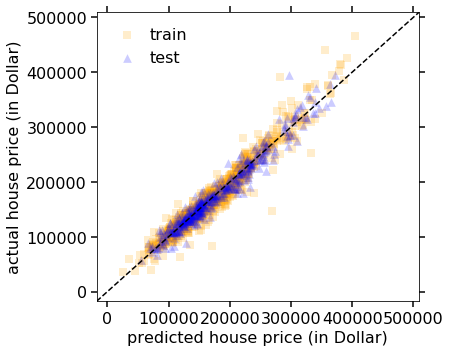

In [37]:
y_train_E_pred = grid_searches[nbest].predict(X_train_E)
y_test_E_pred = grid_searches[nbest].predict(X_test_E)
target_E = 'house price (in Dollar)'
print('RMSLE for targeted values = %.3f (training) and %.3f (test)' 
      % (rmsle(y_train_E, y_train_E_pred),  (rmsle(y_test_E, y_test_E_pred))))

fig4 = plt.figure(4, figsize=(11,5))
ax1 = plt.subplot(121)
ax1 = plot_actual_pred(y_train_E, y_train_E_pred,
                       y_test_E, y_test_E_pred,
                       target_E)
plt.tight_layout()
plt.show()
plt.close()

In [38]:
# predict on a test values
Xpred = all_data3.tail(ntest)
newY = grid_searches[nbest].predict(Xpred)

df = pd.DataFrame({"ID" : test_df['Id'], "SalePrice" : newY})
df.to_csv("prediction.csv", index=False)

# Neural network

In [39]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor


NN_model = Sequential()

NN_model.add(Dense(128, kernel_initializer='normal',input_dim = Xtrain.shape[1], activation='relu'))

NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               40320     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 205,185
Trainable params: 205,185
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
#checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
#callbacks_list = [checkpoint]
#NN_model.fit(Xtrain, Ytrain, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

NN_model.fit(Xtrain, Ytrain, epochs=500, batch_size=32, validation_split = 0.2)

Train on 1051 samples, validate on 263 samples
Epoch 1/500
1051/1051 [==============================] - 0s 371us/step - loss: 128296.9681 - mean_absolute_error: 128296.9681 - val_loss: 51625.1408 - val_mean_absolute_error: 51625.1408
Epoch 2/500
1051/1051 [==============================] - 0s 83us/step - loss: 44651.0713 - mean_absolute_error: 44651.0713 - val_loss: 37276.4298 - val_mean_absolute_error: 37276.4298
Epoch 3/500
1051/1051 [==============================] - 0s 87us/step - loss: 34322.4057 - mean_absolute_error: 34322.4057 - val_loss: 34093.4413 - val_mean_absolute_error: 34093.4413
Epoch 4/500
1051/1051 [==============================] - 0s 83us/step - loss: 30662.9122 - mean_absolute_error: 30662.9122 - val_loss: 28000.2412 - val_mean_absolute_error: 28000.2412
Epoch 5/500
1051/1051 [==============================] - 0s 82us/step - loss: 26960.7662 - mean_absolute_error: 26960.7662 - val_loss: 27598.5988 - val_mean_absolute_error: 27598.5988
Epoch 6/500
1051/1051 [=======

1051/1051 [==============================] - 0s 75us/step - loss: 19559.5710 - mean_absolute_error: 19559.5710 - val_loss: 20878.0650 - val_mean_absolute_error: 20878.0650
Epoch 46/500
1051/1051 [==============================] - 0s 74us/step - loss: 19460.6112 - mean_absolute_error: 19460.6112 - val_loss: 20175.6724 - val_mean_absolute_error: 20175.6724
Epoch 47/500
1051/1051 [==============================] - 0s 74us/step - loss: 19528.9148 - mean_absolute_error: 19528.9148 - val_loss: 20680.5098 - val_mean_absolute_error: 20680.5098
Epoch 48/500
1051/1051 [==============================] - 0s 75us/step - loss: 19583.5994 - mean_absolute_error: 19583.5994 - val_loss: 21176.1774 - val_mean_absolute_error: 21176.1774
Epoch 49/500
1051/1051 [==============================] - 0s 77us/step - loss: 19503.1066 - mean_absolute_error: 19503.1066 - val_loss: 20493.9883 - val_mean_absolute_error: 20493.9883
Epoch 50/500
1051/1051 [==============================] - 0s 76us/step - loss: 19531.165

1051/1051 [==============================] - 0s 81us/step - loss: 16987.4470 - mean_absolute_error: 16987.4470 - val_loss: 19467.2254 - val_mean_absolute_error: 19467.2254
Epoch 90/500
1051/1051 [==============================] - 0s 74us/step - loss: 17296.0679 - mean_absolute_error: 17296.0679 - val_loss: 17985.0723 - val_mean_absolute_error: 17985.0723
Epoch 91/500
1051/1051 [==============================] - 0s 75us/step - loss: 17056.4290 - mean_absolute_error: 17056.4290 - val_loss: 18915.6782 - val_mean_absolute_error: 18915.6782
Epoch 92/500
1051/1051 [==============================] - 0s 85us/step - loss: 16576.1831 - mean_absolute_error: 16576.1831 - val_loss: 18551.8896 - val_mean_absolute_error: 18551.8896
Epoch 93/500
1051/1051 [==============================] - 0s 86us/step - loss: 17821.7400 - mean_absolute_error: 17821.7400 - val_loss: 18550.2271 - val_mean_absolute_error: 18550.2271
Epoch 94/500
1051/1051 [==============================] - 0s 85us/step - loss: 17061.110

1051/1051 [==============================] - 0s 82us/step - loss: 15120.8496 - mean_absolute_error: 15120.8496 - val_loss: 16778.0905 - val_mean_absolute_error: 16778.0905
Epoch 134/500
1051/1051 [==============================] - 0s 82us/step - loss: 14664.9469 - mean_absolute_error: 14664.9469 - val_loss: 18881.4422 - val_mean_absolute_error: 18881.4422
Epoch 135/500
1051/1051 [==============================] - 0s 83us/step - loss: 15087.5223 - mean_absolute_error: 15087.5223 - val_loss: 16877.4564 - val_mean_absolute_error: 16877.4564
Epoch 136/500
1051/1051 [==============================] - 0s 87us/step - loss: 15273.4789 - mean_absolute_error: 15273.4789 - val_loss: 16987.6456 - val_mean_absolute_error: 16987.6456
Epoch 137/500
1051/1051 [==============================] - 0s 82us/step - loss: 14234.6351 - mean_absolute_error: 14234.6351 - val_loss: 17879.8827 - val_mean_absolute_error: 17879.8827
Epoch 138/500
1051/1051 [==============================] - 0s 80us/step - loss: 1551

1051/1051 [==============================] - 0s 77us/step - loss: 14567.6200 - mean_absolute_error: 14567.6200 - val_loss: 17427.7320 - val_mean_absolute_error: 17427.7320
Epoch 178/500
1051/1051 [==============================] - 0s 76us/step - loss: 13388.6563 - mean_absolute_error: 13388.6563 - val_loss: 16390.3830 - val_mean_absolute_error: 16390.3830
Epoch 179/500
1051/1051 [==============================] - 0s 76us/step - loss: 13801.1001 - mean_absolute_error: 13801.1001 - val_loss: 15507.8540 - val_mean_absolute_error: 15507.8540
Epoch 180/500
1051/1051 [==============================] - 0s 74us/step - loss: 13259.1135 - mean_absolute_error: 13259.1135 - val_loss: 15494.8374 - val_mean_absolute_error: 15494.8374
Epoch 181/500
1051/1051 [==============================] - 0s 72us/step - loss: 12782.2308 - mean_absolute_error: 12782.2308 - val_loss: 15698.7285 - val_mean_absolute_error: 15698.7285
Epoch 182/500
1051/1051 [==============================] - 0s 76us/step - loss: 1344

1051/1051 [==============================] - 0s 103us/step - loss: 12474.1567 - mean_absolute_error: 12474.1567 - val_loss: 16859.7938 - val_mean_absolute_error: 16859.7938
Epoch 222/500
1051/1051 [==============================] - 0s 98us/step - loss: 11889.1454 - mean_absolute_error: 11889.1454 - val_loss: 15596.2232 - val_mean_absolute_error: 15596.2232
Epoch 223/500
1051/1051 [==============================] - 0s 91us/step - loss: 11814.1285 - mean_absolute_error: 11814.1285 - val_loss: 15428.2419 - val_mean_absolute_error: 15428.2419
Epoch 224/500
1051/1051 [==============================] - 0s 92us/step - loss: 11641.2587 - mean_absolute_error: 11641.2587 - val_loss: 14960.8298 - val_mean_absolute_error: 14960.8298
Epoch 225/500
1051/1051 [==============================] - 0s 90us/step - loss: 12263.0273 - mean_absolute_error: 12263.0273 - val_loss: 15495.0795 - val_mean_absolute_error: 15495.0795
Epoch 226/500
1051/1051 [==============================] - 0s 91us/step - loss: 116

In [ ]:

# Load wights file of the best model :
#wights_file = 'Weights-478--18738.19831.hdf5' # choose the best checkpoint 
#NN_model.load_weights(wights_file) # load it
#NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])


In [ ]:
y_train_E_pred = NN_model.predict(X_train_E)
y_train_E_pred = np.reshape(y_train_E_pred, (y_train_E_pred.shape[0],))

y_test_E_pred = NN_model.predict(X_test_E)
y_test_E_pred = np.reshape(y_test_E_pred, (y_test_E_pred.shape[0],))

target_E = 'house price (in Dollar)'
print('RMSLE for targeted values = %.3f (training) and %.3f (test)' 
      % (rmsle(y_train_E, y_train_E_pred),  (rmsle(y_test_E, y_test_E_pred))))

fig4 = plt.figure(4, figsize=(11,5))
ax1 = plt.subplot(121)
ax1 = plot_actual_pred(y_train_E, y_train_E_pred,
                       y_test_E, y_test_E_pred,
                       target_E)
plt.tight_layout()
plt.show()
plt.close()

Conclusion